# Classifikasi Genre Musik Pada Dataset musik di Spotify menggunakan Logistic Regression, Decision tree dan Random Forest 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spotify_pre1.csv')
data.head()

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_m,year,mouth,day,day_1_2_3,mouth_1_2_3_4
0,66,2,3,0.748,0.916,-2.634,1,0.0583,0.1020,0.000000,0.518,122.036,3,2019,6,14,2,4
1,67,2,3,0.726,0.815,-4.969,1,0.0373,0.0724,0.004210,0.693,99.972,3,2019,12,13,2,2
2,70,2,3,0.675,0.931,-3.432,0,0.0742,0.0794,0.000023,0.613,124.008,3,2019,7,5,1,4
3,60,2,3,0.718,0.930,-3.778,1,0.1020,0.0287,0.000009,0.277,121.956,3,2019,7,19,2,4
4,69,2,3,0.650,0.833,-4.672,1,0.0359,0.0803,0.000000,0.725,123.976,3,2019,3,5,1,3


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32796 entries, 0 to 32795
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_popularity   32796 non-null  int64  
 1   playlist_genre     32796 non-null  int64  
 2   playlist_subgenre  32796 non-null  int64  
 3   danceability       32796 non-null  float64
 4   energy             32796 non-null  float64
 5   loudness           32796 non-null  float64
 6   mode               32796 non-null  int64  
 7   speechiness        32796 non-null  float64
 8   acousticness       32796 non-null  float64
 9   instrumentalness   32796 non-null  float64
 10  valence            32796 non-null  float64
 11  tempo              32796 non-null  float64
 12  duration_m         32796 non-null  int64  
 13  year               32796 non-null  int64  
 14  mouth              32796 non-null  int64  
 15  day                32796 non-null  int64  
 16  day_1_2_3          327

In [5]:
df.isnull().sum().sum()

0

<Axes: title={'center': 'Genre'}, xlabel='playlist_genre'>

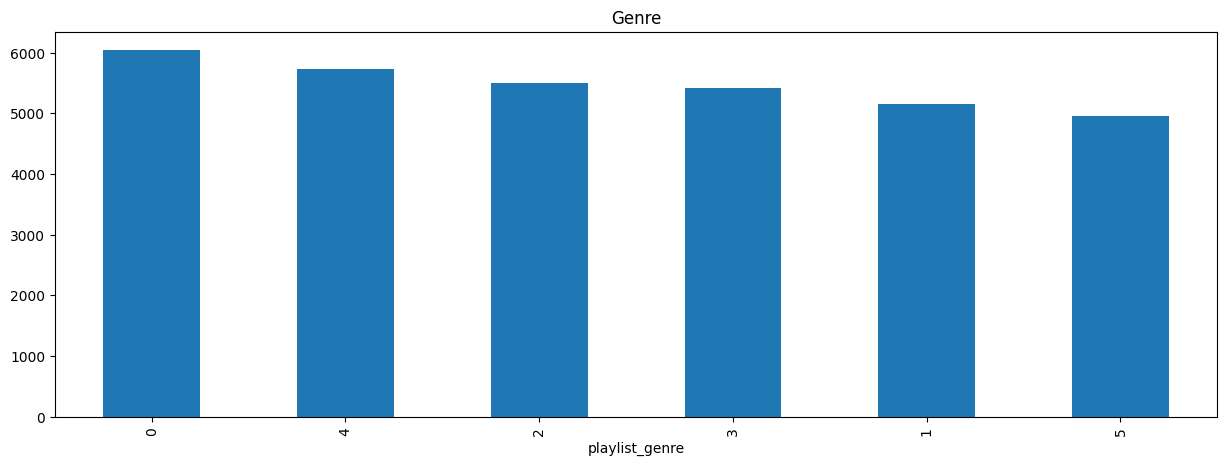

In [6]:
df['playlist_genre'].value_counts().plot(kind='bar',figsize=(15,5), title='Genre')

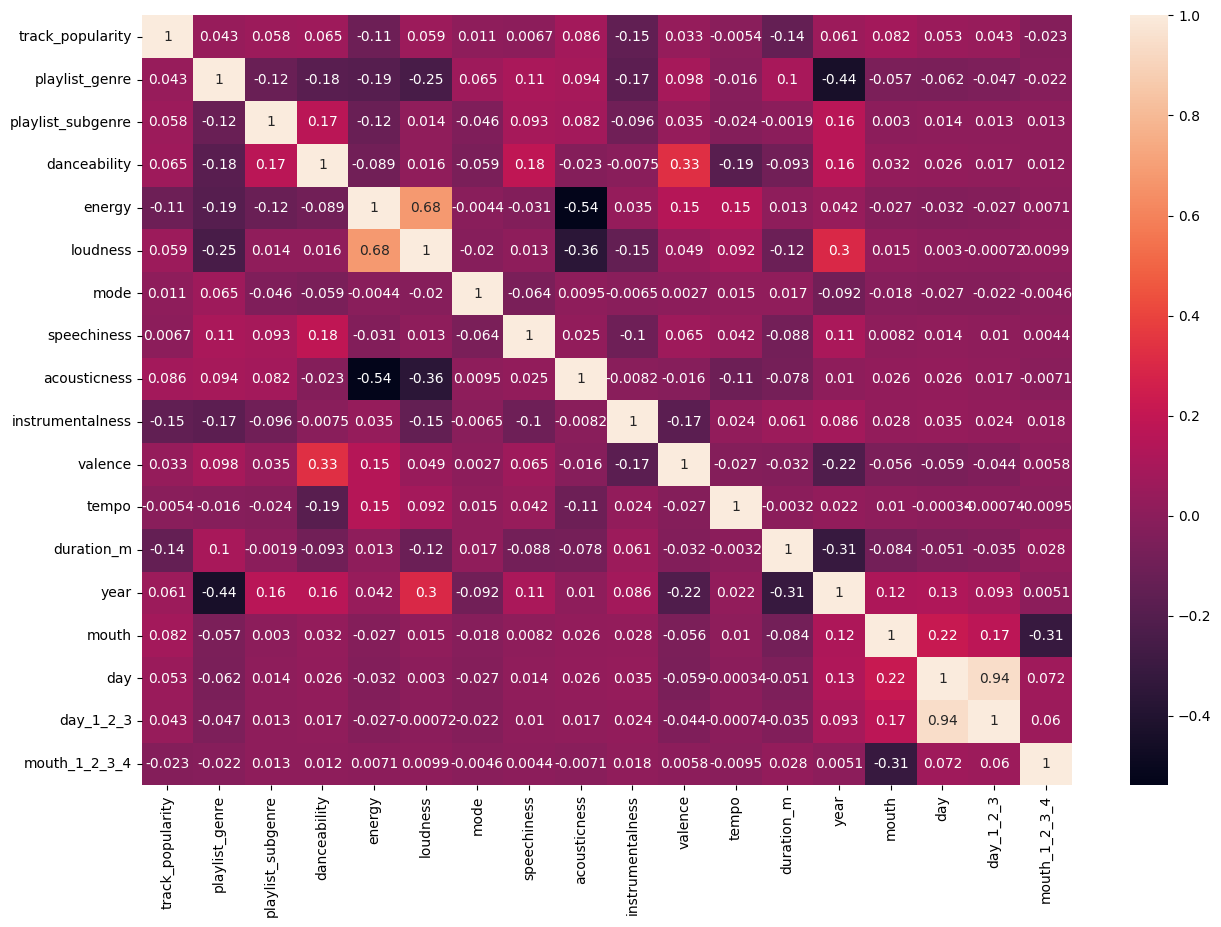

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
# train test split
X = df.drop(columns=['playlist_genre'])
y = df['playlist_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
Pipeline_RF = Pipeline([
    ('scaler', StandardScaler()),
    ('model_RF', RandomForestClassifier(random_state=42))
])

In [10]:
Pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_RF', RandomForestClassifier(random_state=42))])

In [11]:
y_pred_RF = Pipeline_RF.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1239
           1       0.98      0.99      0.98      1064
           2       0.95      0.94      0.95      1070
           3       0.98      0.98      0.98      1044
           4       0.99      0.99      0.99      1163
           5       0.99      0.98      0.98       980

    accuracy                           0.97      6560
   macro avg       0.97      0.97      0.97      6560
weighted avg       0.97      0.97      0.97      6560



In [13]:
Pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('model_nb', GaussianNB())
])

In [14]:
Pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model_nb', GaussianNB())])

In [15]:
y_pred_nb = Pipeline_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.54      0.72      0.62      1239
           1       0.43      0.50      0.46      1064
           2       0.41      0.38      0.40      1070
           3       0.48      0.45      0.47      1044
           4       0.58      0.41      0.48      1163
           5       0.70      0.65      0.67       980

    accuracy                           0.52      6560
   macro avg       0.52      0.52      0.52      6560
weighted avg       0.52      0.52      0.52      6560



In [26]:
Pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model_svm', SVC(random_state=42))
])

In [27]:
Pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_svm', SVC(random_state=42))])

In [28]:
y_pred_svm = Pipeline_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1239
           1       0.56      0.61      0.58      1064
           2       0.54      0.57      0.55      1070
           3       0.62      0.53      0.57      1044
           4       0.65      0.68      0.66      1163
           5       0.81      0.80      0.80       980

    accuracy                           0.65      6560
   macro avg       0.65      0.65      0.65      6560
weighted avg       0.65      0.65      0.65      6560



In [29]:
# accuracy score
print('Random Forest: ', accuracy_score(y_test, y_pred_RF))
print('Naive Bayes: ', accuracy_score(y_test, y_pred_nb))
print('SVM: ', accuracy_score(y_test, y_pred_svm))

Random Forest:  0.9730182926829268
Naive Bayes:  0.519359756097561
SVM:  0.65


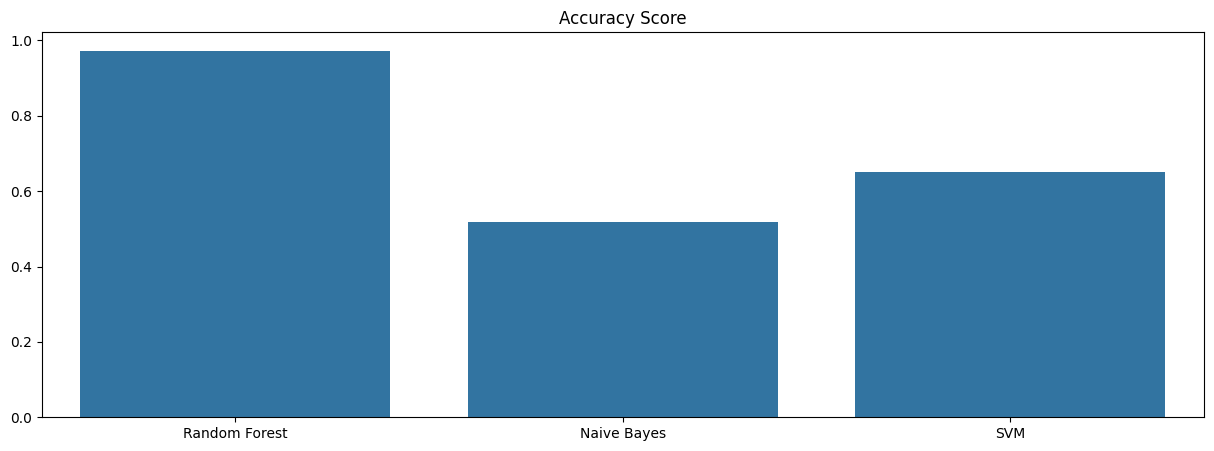

In [31]:
# visualsasi akurasi score 
plt.figure(figsize=(15,5))
sns.barplot(x=['Random Forest', 'Naive Bayes', 'SVM'], y=[accuracy_score(y_test, y_pred_RF), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)])
plt.title('Accuracy Score')
plt.show()